In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fft2,ifft, fftshift, hfft
import matplotlib.pyplot as plt
import skimage
from skimage import io
import cv2 as cv
import math

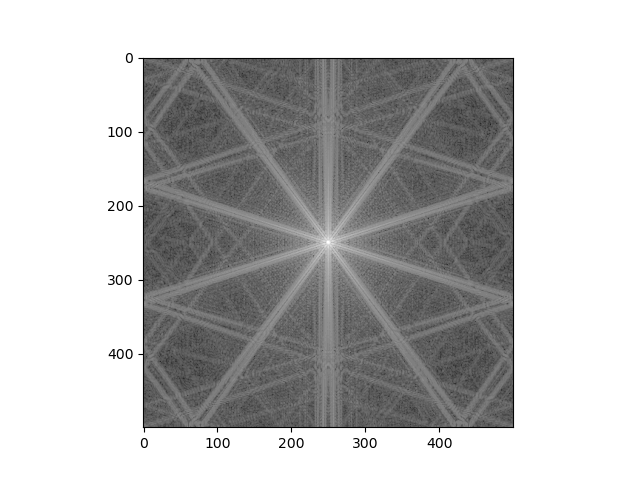

In [2]:
from IPython.display import Image
Image(filename="pasabajas.gif")

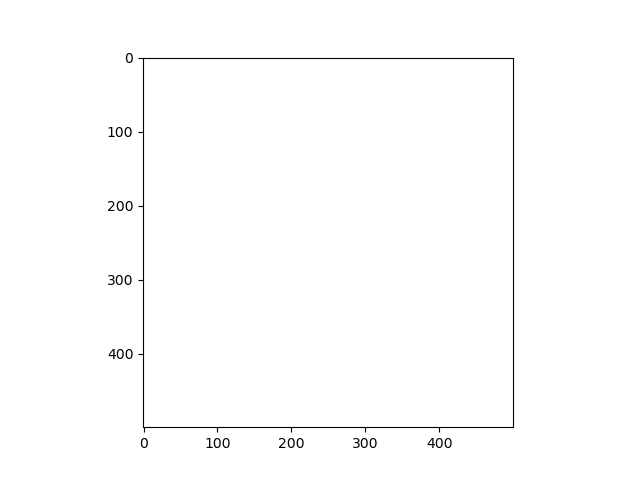

In [3]:
from IPython.display import Image
Image(filename="pasaaltas.gif")

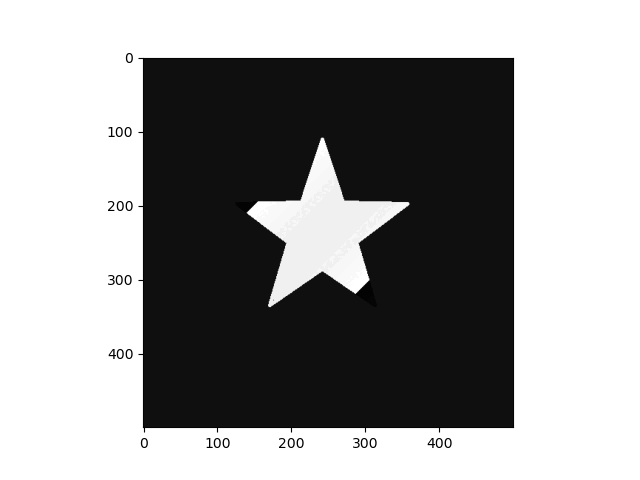

In [4]:
from IPython.display import Image
Image(filename="rpasoalto.gif")

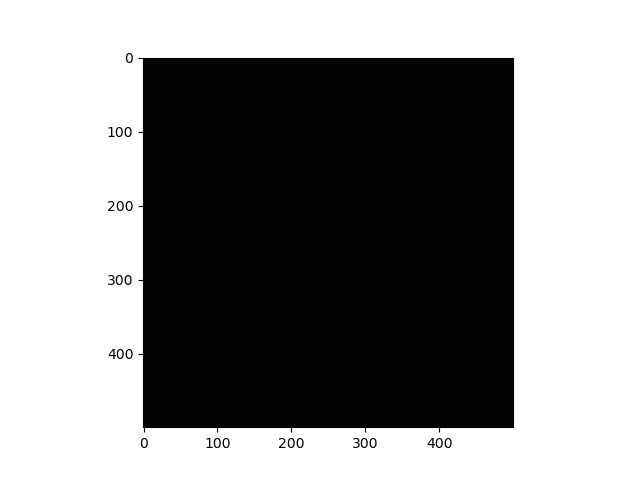

In [5]:
from IPython.display import Image
Image(filename="rpasobajo.gif")

In [22]:
#Función
def getfilters(radio):
    x = np.linspace(-249, 250,500)
    y = np.linspace(-249, 250, 500)
    # full coordinate arrays
    xx, yy = np.meshgrid(x, y)
    zz = np.sqrt(xx**2 + yy**2)
    cL2 = zz < radio
    cL = np.asarray(cL2).astype(int)
    cH2 = np.logical_not(cL2)
    cH = np.asarray(cH2).astype(int)
    return cL, cH

(500, 500, 3)


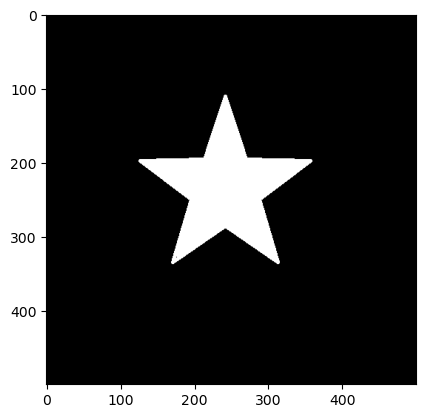

In [23]:
#Leer una imagen
Im = io.imread('miimagen1.png')
plt.imshow(Im)
print(Im.shape)

# Guardando las imágenes para hacer animaciones

In [24]:
#Extraemos un plano de la imagen (solo si la imagen es de 3 planos)
im = Im[:,:,2]
#Aplicamos TF y visualizamos
ft = np.fft.fftshift(np.fft.fft2(im))

In [29]:
import glob
from PIL import Image
y=2
for i in range(1, 200, 10):
    cL, cH = getfilters(i)
    #Pasabajas
    l_ft = ft*cL
    #Pasaaltas
    h_ft = ft*cH;
    #% Volver al espacio directo, se hace la TF inversa
    low_filtered_image =  np.fft.ifft2(l_ft)
    high_filtered_image = np.fft.ifft2(h_ft)

    #Se arrastran artefactos imaginarios aún, entonces se eliminan 
    #y se adecúan los datos para visualización
     
    plt.imshow(np.log(abs(l_ft)), cmap='gray')
    plt.savefig("pasa_bajas{y}.png".format(y=y))
    plt.close()
    y+=1
   


C:\Users\ACER\AppData\Local\Temp\ipykernel_13240\27265734.py:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(l_ft)), cmap='gray')


In [30]:
import glob
from PIL import Image
y=2
for i in range(1, 200, 10):
    cL, cH = getfilters(i)
    #Pasabajas
    l_ft = ft*cL
    #Pasaaltas
    h_ft = ft*cH;
    #% Volver al espacio directo, se hace la TF inversa
    low_filtered_image =  np.fft.ifft2(l_ft)
    high_filtered_image = np.fft.ifft2(h_ft)

    #Se arrastran artefactos imaginarios aún, entonces se eliminan 
    #y se adecúan los datos para visualización
     
    plt.imshow(np.log(abs(h_ft)), cmap='gray')
    plt.savefig("pasa_altas{y}.png".format(y=y))
    plt.close()
    y+=1
   

C:\Users\ACER\AppData\Local\Temp\ipykernel_13240\3338719706.py:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(h_ft)), cmap='gray')


In [32]:
import glob
from PIL import Image
y=2
for i in range(1, 200, 10):
    cL, cH = getfilters(i)
    #Pasabajas
    l_ft = ft*cL
    #Pasaaltas
    h_ft = ft*cH;
    #% Volver al espacio directo, se hace la TF inversa
    low_filtered_image =  np.fft.ifft2(l_ft)
    high_filtered_image = np.fft.ifft2(h_ft)
    low_f = np.uint8(abs(low_filtered_image))
    high_f = np.uint8(abs(high_filtered_image))
    #Se arrastran artefactos imaginarios aún, entonces se eliminan 
    #y se adecúan los datos para visualización
     
    plt.imshow(low_f, cmap='gray')
    plt.savefig("Resultado_paso_bajo{y}.png".format(y=y))
    plt.close()
    y+=1

In [33]:
import glob
from PIL import Image
y=2
for i in range(1, 200, 10):
    cL, cH = getfilters(i)
    #Pasabajas
    l_ft = ft*cL
    #Pasaaltas
    h_ft = ft*cH;
    #% Volver al espacio directo, se hace la TF inversa
    low_filtered_image =  np.fft.ifft2(l_ft)
    high_filtered_image = np.fft.ifft2(h_ft)
    low_f = np.uint8(abs(low_filtered_image))
    high_f = np.uint8(abs(high_filtered_image))
  
    #Se arrastran artefactos imaginarios aún, entonces se eliminan 
    #y se adecúan los datos para visualización
     
    plt.imshow(high_f, cmap='gray')
    plt.savefig("Resultado_paso_alto{y}.png".format(y=y))
    plt.close()
    y+=1